## Decision Tree using Random-Oversampler

In [1]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv (r'Normalized_New_Extracted_Data.csv')
df['Label'] = df['Label'].replace('bad',1)
df['Label'] = df['Label'].replace('good',0)

In [2]:
def Classification_Report_Plotter(ytest,pred):
    C_Report=classification_report(ytest, pred,output_dict=True)
    C_Report_0=C_Report['0']
    C_Report_1=C_Report['1']
    del C_Report_1['support']
    del C_Report_0['support']
    cmat=confusion_matrix(ytest, pred)
    accuracy=cmat.diagonal()/cmat.sum(axis=1)
    print("Malicious Accuracy",accuracy[1])
    print("Good Accuracy",accuracy[0])
    C_Report_0['accuracy']=accuracy[0]
    C_Report_1['accuracy']=accuracy[1]
    df = pd.DataFrame([C_Report_0,C_Report_1],index=['Good','Malicious'],).transpose()
    fig, ax= plt.subplots(1,1, figsize=(6,5))
    df.plot.bar(ax=ax,title='Default Random Forest',fontsize =12,color=['g', 'r']).legend(bbox_to_anchor=(.7, 1))
    ##ax.set_xlabel('Scores')
    fig.tight_layout()

In [3]:
df1=df
Data=df1.drop(labels='URL', axis=1) 

In [4]:
df['Label'].value_counts()

0    344821
1     75643
Name: Label, dtype: int64

In [5]:
Data= Data.drop(labels='Label', axis=1) 
col_names=Data.columns


In [6]:
mask = []
for x in range(0, 63):
    if(x < 17):
        mask.append(False)
    else:
        mask.append(True)
   

In [7]:
from imblearn.over_sampling import RandomOverSampler
train_x, test_x, train_y, test_y = train_test_split(Data,
                                                        df['Label'],
                                                        test_size =0.20,
                                                        stratify = df.Label)


ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(train_x, train_y)


In [10]:
Train_Data=pd.DataFrame(X_res)
Test_Data=pd.DataFrame(test_x)
Train_Data.columns=col_names
Test_Data.columns=col_names

In [11]:
DT_Test=Test_Data
DT_Train=Train_Data

In [12]:
dt = DecisionTreeClassifier()
dt.fit(DT_Train, y_res);
y_pred = dt.predict(DT_Test)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y, y_pred))

0.900764629636236


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     68964
           1       0.70      0.77      0.74     15129

   micro avg       0.90      0.90      0.90     84093
   macro avg       0.83      0.85      0.84     84093
weighted avg       0.90      0.90      0.90     84093



In [15]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(test_y, y_pred))

Confusion Matrix:
[[64080  4884]
 [ 3461 11668]]


Malicious Accuracy 0.7712340538039527
Good Accuracy 0.9291804419697234


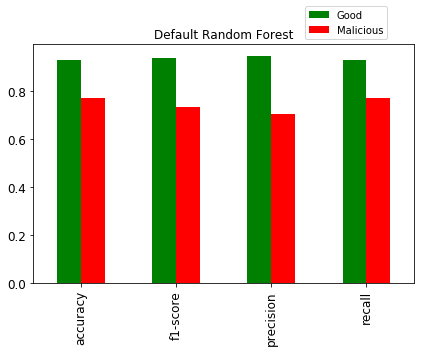

In [16]:
Classification_Report_Plotter(test_y, y_pred)

[[64080  4884]
 [ 3461 11668]]


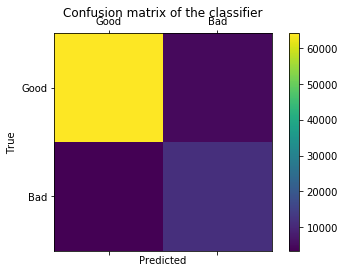

In [17]:
from sklearn.metrics import confusion_matrix

labels = ['Good', 'Bad']
cm = confusion_matrix(test_y, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()